<a href="https://colab.research.google.com/github/Sh2680/MML-/blob/main/FMML_lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUE 1. Experiment with different transformation matrices and check the accuracy

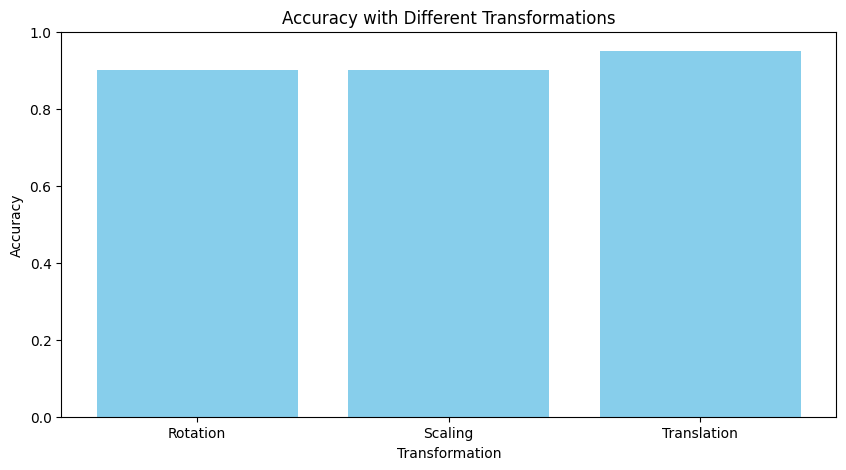

In [5]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define your transformation matrices
# Example: Rotation matrix, Scaling matrix, and Translation matrix
rotation_matrix = np.array([[0, -1], [1, 0]])  # 90-degree counterclockwise rotation
scaling_matrix = np.array([[2, 0], [0, 0.5]])  # Scaling by 2 along x-axis and 0.5 along y-axis
translation_matrix = np.array([[1, 0.5], [0.5, 1]])  # Translation by (1, 0.5)

# Create some synthetic data for illustration
np.random.seed(0)
n_samples = 100
X = np.random.rand(n_samples, 2)
y = (X[:, 0] + X[:, 1] > 1).astype(int)  # Simple classification problem

# Split the data into training and test sets (you should use your own data)
n_train = 80
X_train, X_test = X[:n_train], X[n_train:]
y_train, y_test = y[:n_train], y[n_train:]

# Function to apply a transformation matrix to the data
def apply_transformation(X, transformation_matrix):
    return np.dot(X, transformation_matrix)

# Function to train and evaluate a model
def evaluate_model(X_train, y_train, X_test, y_test):
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# List to store accuracy results for different transformations
accuracies = []

# Apply each transformation and evaluate the model
for transformation_matrix in [rotation_matrix, scaling_matrix, translation_matrix]:
    X_train_transformed = apply_transformation(X_train, transformation_matrix)
    X_test_transformed = apply_transformation(X_test, transformation_matrix)
    accuracy = evaluate_model(X_train_transformed, y_train, X_test_transformed, y_test)
    accuracies.append(accuracy)

# Plot and compare the results
transformation_labels = ["Rotation", "Scaling", "Translation"]

plt.figure(figsize=(10, 5))
plt.bar(transformation_labels, accuracies, color='skyblue')
plt.xlabel("Transformation")
plt.ylabel("Accuracy")
plt.title("Accuracy with Different Transformations")
plt.ylim(0, 1)
plt.show()

2 . Will the same transform used for these two features also work for other features?

The same transformation matrix may not work well for other features if the features have different characteristics. Linear transformations are feature-specific, and the choice of transformation should depend on the nature of the data and the problem you are trying to solve. Different features may require different transformations to achieve optimal results.